# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Tova Thorén

Vem du har presenterat för: Ahmad Zalkat

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
model = ResNet50(weights='imagenet')
# model.summary()  ---  Total params: 25,636,712 (97.80 MB), trainable: 25,583,592. Input shape (None, 224, 224, 3) 224x224 pixels, RGB, batch-size variable

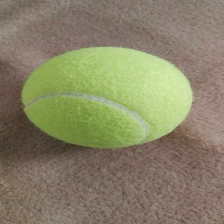

In [4]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [5]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [6]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [7]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [8]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7498354e-06), ('n03942813', 'ping-pong_ball', 5.5182763e-08)]


# 1. Take some pictures yourself and predict their class.

['Bilder\\kaffekopp.jpg', 'Bilder\\kruka.jpg', 'Bilder\\laptop.jpg', 'Bilder\\solglasögon.jpg']


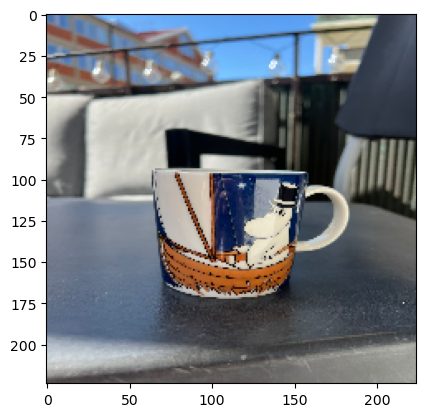

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted: [[('n03063599', 'coffee_mug', 0.83246326), ('n07930864', 'cup', 0.16500773), ('n07920052', 'espresso', 0.00097113085)]]


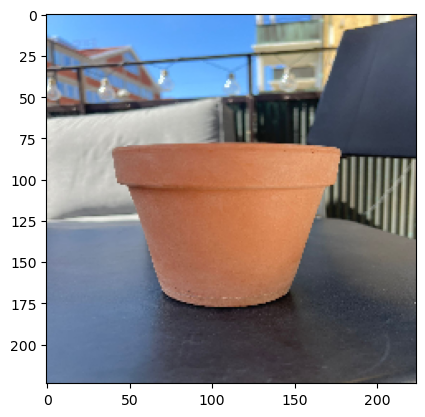

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted: [[('n03991062', 'pot', 0.5552098), ('n03775546', 'mixing_bowl', 0.115697384), ('n03899768', 'patio', 0.02692712)]]


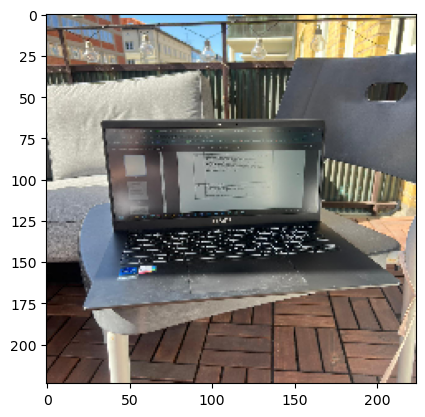

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted: [[('n03642806', 'laptop', 0.2585418), ('n02892201', 'brass', 0.14082327), ('n03832673', 'notebook', 0.09105875)]]


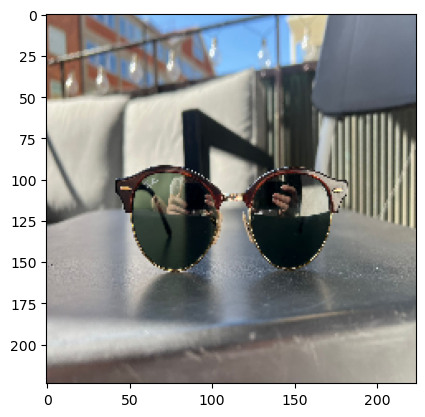

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted: [[('n04356056', 'sunglasses', 0.8315888), ('n04355933', 'sunglass', 0.16832319), ('n02965783', 'car_mirror', 1.5854144e-05)]]


In [9]:
# Get all the images
folder_path = "Bilder"
pattern = folder_path + '/*.jpg'
img_paths = glob.glob(pattern)
print(img_paths)

# Load and preprocess images
for i in img_paths:
    img = image.load_img(i, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

# Show images
    plt.imshow(img)
    plt.show()

# Predict classes 
    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds, top=3))

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Using a pretrained model saves us a lot of time and is also powerful when you have limited training data and want to make predictions on similar tasks. 

It takes time to train a whole network, optimizing weights and biases (parameters), so using an already trained model is very benificial. The pretrained weights have been tuned on large datasets and therefore usually generalize well on new data with similar features. This also allows for transfer learning; using the pretrained weights, only retraining the final layers and still achive a high accuracy.